## Análise de Dados Ifood

Aqui segue um estudo sobre a base de dados "iFood Restaurants Data", que fiz para aplicar parte das habilidades desenvolvidas no módulo 4 da formação de Cientista de dados da DNC.
Vou iniciar realizando uma Análise exploratória dos dados, explorando inicialmente a estrutura dos dados, detectando anomalias e outliers, verificando distribuições de variáveis e testando, possivelmente, hipóteses.

### Carregando os dados

A base de dados está disponível no kaggle, assim, para facilitar o processo de carregamento dos dados, vou utilizar a biblioteca do kaggle e carregar os dados direto de lá junto ao pandas.

In [ ]:
%pip install kagglehub

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ricardotachinardi/ifood-restaurants-data")

In [ ]:
import pandas as pd

df = pd.read_csv(path + '/ifood-restaurants-february-2021.csv')

df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


### Informações do dataframe

Agora vamos verificar as características do nosso dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

Será que temos valores nulos?

In [ ]:
df.isna().sum()

,0
availableForScheduling,0
avatar,277
category,0
delivery_fee,0
delivery_time,0
distance,0
ibge,0
minimumOrderValue,0
name,0
paymentCodes,2


Sim, temos valores nulos em "avatar" e em "paymentsCodes", que são colunas que não vamos precisar, logo, podemos retirá-las da nossa base de dados.

Vou optar por criar um novo DF com os dados que vou utilizar, assim, mantenho o DF original e consigo modificar o novo como precisar.

As colunas que quero usar: availbleForScheduling, Category, delivery_fee, delivery_time, price_range e rating

Mas antes, vamos verificar se temos valores duplicados

In [ ]:
#Listando todas as colunas do DF
columns = df.columns.tolist()

In [ ]:
#Agurpando os dados por todas as colunas e contando o número de ocorrências
duplicated_df = df.groupby(columns).size().reset_index(name='count')

In [ ]:
#Filtrando os casos onde o count é maior do que 1
duplicated_rows = duplicated_df[duplicated_df['count'] > 1]
duplicated_rows

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url,count


Como tivemos um retorno vazio, então nossos dados são únicos



### Métodos de pagamentos

Antes de quebrar meu DF, quero estudar somente os métodos de pagamentos

In [ ]:
df['paymentCodes'].unique()
todos_os_metodos = ' $$ '.join(df['paymentCodes'].dropna().astype(str))
metodos_lista = todos_os_metodos.split(' $$ ')

from collections import Counter
contagem = Counter(metodos_lista)

df_metodos = pd.DataFrame(contagem.items(), columns=['Metodo_Pagamento', 'Frequencia'])
df_metodos = df_metodos.sort_values(by='Frequencia', ascending=False).reset_index(drop=True)
df_metodos


,Metodo_Pagamento,Frequencia
0,MPAY,406308
1,VIS,406108
2,MC,406103
3,AM,405884
4,ELO,405843
...,...,...
62,NUTCRD,1346
63,CHE,1001
64,SAP,130
65,VA_ON,24


Vamos tentar traduzir esses valores com base em pesquisas

In [ ]:
traducao_paymentCodes = {
'MPAY': 'Pagamento via app',
    'VIS': 'Visa',
    'MC': 'MasterCard',
    'AM': 'American Express',
    'ELO': 'Elo',
    'HIPER': 'HiperCard',
    'MOVPAY_MC': 'Pagamento móvel MasterCard',
    'MOVPAY_VIS': 'Pagamento móvel Visa',
    'MOVPAY_ELO': 'Pagamento móvel Elo',
    'MOVPAY_AM': 'Pagamento móvel Amex',
    'MOVPAY_DNR': 'Pagamento móvel Diners',
    'MOVPAY_HIPER': 'Pagamento móvel HiperCard',
    'ELOD': 'Elo Débito',
    'GPY_ELO': 'Gateway Elo',
    'GPY_ELOD': 'Gateway Elo Débito',
    'APL_VISE': 'Aplicativo Visa Electron',
    'APL_ELOD': 'Aplicativo Elo Débito',
    'APL_MCMA': 'Aplicativo MasterCard Maestro',
    'GPY_MCMA': 'Gateway MasterCard Maestro',
    'APL_ELO': 'Aplicativo Elo',
    'GPY_VISE': 'Gateway Visa Electron',
    'GPY_VIS': 'Gateway Visa',
    'GPY_MC': 'Gateway MasterCard',
    'DNR': 'Diners Club',
    'APL_VIS': 'Aplicativo Visa',
    'APL_MC': 'Aplicativo MasterCard',
    'IFE': 'IFood Benefícios',
    'VISE': 'Visa Electron',
    'MCMA': 'MasterCard Maestro',
    'IMV': 'IFood Mercado Virtual',
    'MEREST': 'MasterCard Restaurante',
    'VIREST': 'Visa Restaurante',
    'RDREST': 'Redeshop Restaurante',
    'VSREST': 'Visa Electron Restaurante',
    'DIN': 'Dinheiro',
    'RED': 'Redeshop',
    'REC': 'Vale Refeição',
    'RHIP': 'Refeição HiperCard',
    'RAM': 'Refeição AMEX',
    'DNREST': 'Diners Restaurante',
    'VVREST': 'VR Restaurante',
    'RSODEX': 'Sodexo Restaurante',
    'BANRD': 'BanriCard',
    'SRP': 'Sodexo Refeição Pass',
    'TRE': 'Ticket Refeição',
    'VR_SMA': 'VR Smart',
    'BANRC': 'Banricard Refeição',
    'VRO': 'VR Outros',
    'GOODC': 'GoodCard',
    'ALR': 'Alelo Refeição',
    'VERDEC': 'VerdeCard',
    'NUGO': 'Nutricash Gold',
    'BENRON': 'Benron',
    'TRO': 'Ticket Restaurante Outros',
    'BENVVR': 'Ben Visa Vale Refeição',
    'GRNCAR': 'Green Card',
    'TVER': 'Ticket Verde',
    'VALECA': 'ValeCard',
    'RSELE': 'Sodexo Eletrônico',
    'CPRCAR': 'CooperCard',
    'GRNCPL': 'Green Card Plus',
    'IFV': 'IFood Vale',
    'NUTCRD': 'Nutricash',
    'CHE': 'Cheque',
    'SAP': 'SAP Interno',
    'VA_ON': 'Vale Online',
    'LPCLUB': 'Livelo/Programa de Pontos'
}

df_metodos['Metodo_Pagamento_Traduzido'] = df_metodos['Metodo_Pagamento'].map(traducao_paymentCodes)


In [ ]:
df_metodos = df_metodos[df_metodos['Metodo_Pagamento_Traduzido']!='Outros']
df_metodos_top_5 = df_metodos.groupby('Metodo_Pagamento_Traduzido')['Frequencia'].sum().sort_values(ascending=False).head(5)
df_metodos_top_5

,Frequencia
Metodo_Pagamento_Traduzido,
Pagamento via app,406308
Visa,406108
MasterCard,406103
American Express,405884
Elo,405843


### Criação DF de tags

Aqui vamos separar também as tags em outro DF para tentar inferir algumas coisas sobre elas. Vamos começar com o mesmo processo feito em pagamentos


In [ ]:
###Verificar
df['taglist']=df['tags'].fillna('').apply(lambda x: x.split(' $$ '))
df_taglist = df[['taglist','rating']].explode('taglist')

In [ ]:
###Verificar
df_taglist.head(10)

,taglist,rating
0,ADDRESS_PREFORM_TYPE,0.0
0,CART::MCHT::100_DELIVERY_FEE_MERCH_3KM_0,0.0
0,CPGN_USER_DISCOUNT_BR_LIST,0.0
0,GUIDED_HELP_TYPE,0.0
0,NOVO,0.0
1,ADDRESS_PREFORM_TYPE,0.0
1,GUIDED_HELP_TYPE,0.0
1,MESDODOCE_FIDELIDADE_DEZ20,0.0
1,NOVO,0.0
2,ADDRESS_PREFORM_TYPE,0.0


In [ ]:
###Verificar
df_taglist[df_taglist['taglist']=='NOVO'].describe()

,rating
count,207753.000000
mean,2.412615
std,2.317546
min,0.000000
25%,0.000000
50%,3.480770
75%,4.784480
max,5.000000


In [ ]:
###Avaliar
df_taglist[df_taglist['taglist']!='NOVO'].describe()

,rating
count,3.342430e+06
mean,3.094247e+00
std,2.121464e+00
min,0.000000e+00
25%,0.000000e+00
50%,4.371430e+00
75%,4.709680e+00
max,5.000000e+00


In [ ]:
###Próximo: Verificar dentro da nossa analise os dados que são de novos restaurantes e tentar criar a nova analise sem esses restaurantes novos.

### Criação de DF de Analise
Agora vamos criar o nosso DF para análise com as outras variáveis

In [ ]:
df_analise = df[['availableForScheduling', 'category', 'delivery_fee', 'delivery_time', 'price_range', 'rating']]
df_analise

,availableForScheduling,category,delivery_fee,delivery_time,price_range,rating
0,False,Marmita,3.99,27,CHEAPEST,0.00000
1,False,Açaí,7.99,61,CHEAPEST,0.00000
2,False,Bebidas,11.99,70,MODERATE,0.00000
3,False,Carnes,16.49,63,CHEAPEST,0.00000
4,False,Brasileira,11.99,58,CHEAPEST,0.00000
...,...,...,...,...,...,...
406394,False,Açaí,9.00,60,CHEAPEST,4.95000
406395,False,Açaí,6.00,50,CHEAPEST,0.00000
406396,False,Açaí,0.00,40,CHEAPEST,4.46602
406397,False,Lanches,8.00,60,CHEAPEST,5.00000


### Agora vamos realizar a análise de estatísticas descritivas

"Realizar uma análise descritiva das variáveis para obter
informações sobre as distribuições, medidas de tendência
central (média, mediana) e dispersão (desvio padrão,
intervalo interquartil). Isso ajuda a entender como os
dados estão distribuídos."


In [ ]:
df_analise.describe()

,delivery_fee,delivery_time,rating
count,406399.000000,406399.000000,406399.000000
mean,6.804577,47.432747,2.522241
std,4.315815,19.662736,2.286103
min,0.000000,-1.000000,0.000000
25%,4.000000,35.000000,0.000000
50%,6.000000,45.000000,3.958900
75%,9.490000,60.000000,4.718750
max,35.000000,5050.000000,5.000000


Agora vamos tentar entender as estatísticas do nosso 'df_analise'

1- delivery_fee: Aqui notamos que a maioria das taxas estão entre 4,00 e 9,49 valor monetário. Ficará mais claro quando fizermos um histograma dessa coluna. Tem muita variação, com valor máximo atingindo 35,00. Acredito que conseguiriamos realizar um estudo de clusterização com base nessa coluna, mas é interessante saber o motivo

2- delivery_time: De cara percebemos dois valores problemáticos, o mínimo e o máximo, que podemos considerar outliers e, provavelmente, dropar do nosso df.

3- rating: temos uma mediana bem maior que a média, o que pode indicar muitos valores baixos. Temos 25% dos dados com avaliação 0,0.

Agora, vamos remover os outliers.


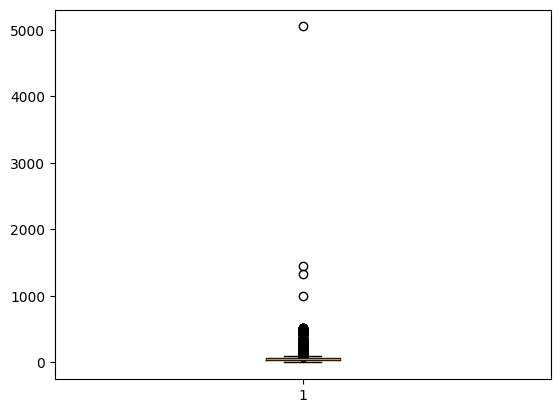

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_analise['delivery_time'])
plt.show()

Temos sim valores considerados outliers, inclusive o que ultrapassa 5000 minutos (algo em torno de 84 horas em delivery_time), não sei você, mas eu não conseguiria aguardar 84 horas para uma pizza chegar.

Vou tratar os outliers removendo-os de acordo com limites inferior e superior. Ou seja, calcularei o intervalo interquartil e retirarei do meu df_analise todos os valores que ultrapassem meus limites.

In [ ]:
Q1 = df_analise['delivery_time'].quantile(0.25)
Q3 = df_analise['delivery_time'].quantile(0.75)

IQR = Q3-Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_analise = df_analise[(df_analise['delivery_time'] >= limite_inferior)&(df_analise['delivery_time'] <= limite_superior)]
df_analise = df_analise[df_analise['delivery_time'] > 0]

Vamos descrever o nosso df novamente

In [ ]:
df_analise.describe()

,delivery_fee,delivery_time,rating
count,402470.000000,402470.000000,402470.000000
mean,6.785578,46.721957,2.521229
std,4.299065,15.717502,2.286443
min,0.000000,2.000000,0.000000
25%,4.000000,35.000000,0.000000
50%,6.000000,45.000000,3.957450
75%,9.490000,60.000000,4.718750
max,35.000000,97.000000,5.000000


from matplotlib import pyplot as plt
_df_0['delivery_fee'].plot(kind='hist', bins=20, title='delivery_fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['delivery_time'].plot(kind='hist', bins=20, title='delivery_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='delivery_fee', y='delivery_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='delivery_time', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['delivery_time']
  ys = series['delivery_fee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('delivery_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('delivery_time')
_ = plt.ylabel('delivery_fee')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['delivery_time']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('delivery_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('delivery_time')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['delivery_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'delivery_time'}, axis=1)
              .sort_values('delivery_time', ascending=True))
  xs = counted['delivery_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('delivery_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('delivery_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['delivery_fee'].plot(kind='line', figsize=(8, 4), title='delivery_fee')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['delivery_time'].plot(kind='line', figsize=(8, 4), title='delivery_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

### Visualizar os dados

Agora com os dados limpos, podemos visualizar os dados com algumas visualizações comuns. Segundo o próprio conteúdo da DNC:

Histograma: Para analisar a distribuição de variáveis
numéricas.
Boxplot: Para identificar outliers e analisar a dispersão
dos dados.
Gráficos de dispersão (scatter plots): Para visualizar a
relação entre duas variáveis.

O Boxplot já fizemos, então vamos seguir com as demais análises.

O que faremos? Vamos avaliar delivery_time x rating (dispersão), rating (histograma), delivery_fee x rating (dispersão).

### Histograma de Rating

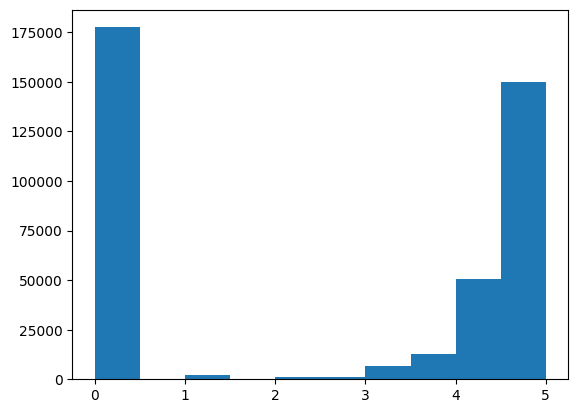

In [ ]:
plt.hist(df_analise['rating'])
plt.show()

Conforme havíamos percebido no describe(), temos muito mais valores "0.0" em rating.

### Histograma de Delivery fee

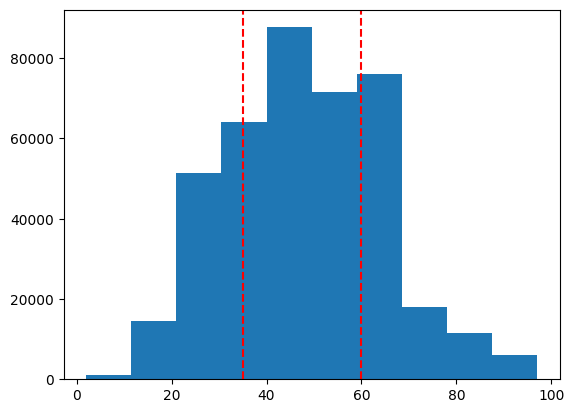

In [ ]:
Q1 = df_analise['delivery_time'].quantile(0.25)
Q3 = df_analise['delivery_time'].quantile(0.75)

plt.hist(df_analise['delivery_time'])
plt.axvline(x=Q1, color='red', linestyle = '--')
plt.axvline(x=Q3, color='red', linestyle = '--')
plt.show()

### Dispersão Delivey time vs Rating

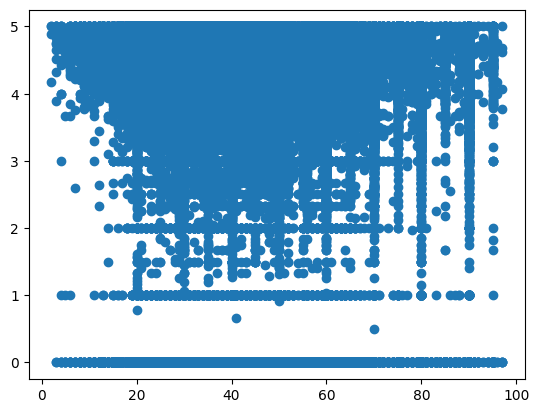

In [ ]:
plt.scatter(df_analise['delivery_time'], df_analise['rating'],)
plt.show()

Aqui notamos que existe uma certa relação entre o tempo de entrega e a nota, essa é a hipótese inicial baseada na análise gráfica. Como comprovar? Utilizando análise estatística e calculando nosso r²

In [ ]:
r2 = df_analise['rating'].corr(df_analise['delivery_time'])**2
r2

np.float64(0.01711648341817297)

Como temos um R² de apenas 2%, a nossa hipótese inicial muito provavelmente está equivocada. Ou seja, talvez o nosso delivey_time não influencie tanto assim no nosso rating.
Vamos tentar comprovar isso com um mapa de calor.

### Taxa de entrega vs Rating

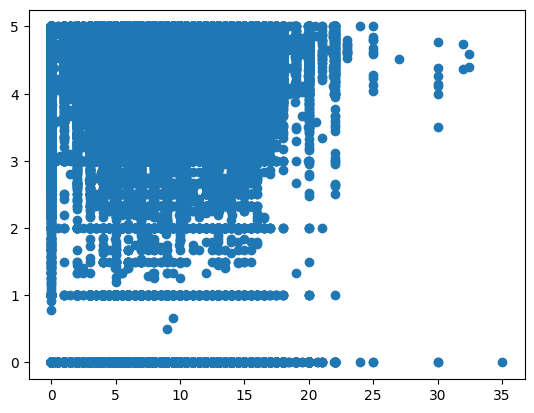

In [ ]:
plt.scatter(df_analise['delivery_fee'],df_analise['rating'])
plt.show()

Aqui notamos, provavelmente, uma relação mais forte entre essas duas variáveis, que só conseguiremos comprovar com base no nosso R²

In [ ]:
r2 = df_analise['rating'].corr(df_analise['delivery_fee'])**2
r2

np.float64(0.0011520176954447788)

A relação aqui é ainda menor que no caso anterior, ou seja, a taxa de entrega não influencia na avaliação final do restaurante.

### Agora vamos outras análises

Aqui vamos selecionar as 5 categorias com melhor avaliação média.

In [ ]:
categoria_rating = df_analise.groupby("category")["rating"].mean()
categoria_rating = categoria_rating.sort_values(ascending=False).head(5)

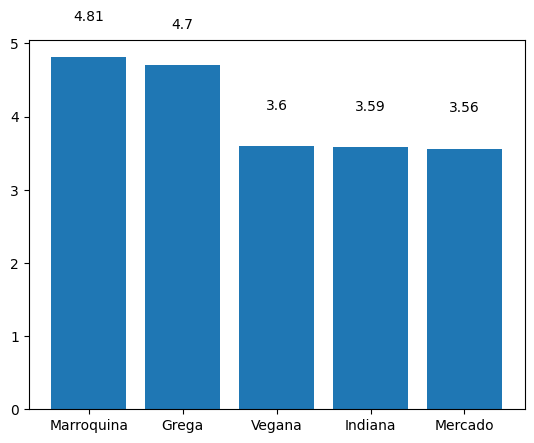

In [ ]:
plt.bar(categoria_rating.index, categoria_rating.values)
for i, valor in enumerate(categoria_rating.values):
    plt.text(i, valor + 0.5, str(round(valor,2)), ha='center')
plt.show()

Agora vamos analisar as categorias com mais restaurantes

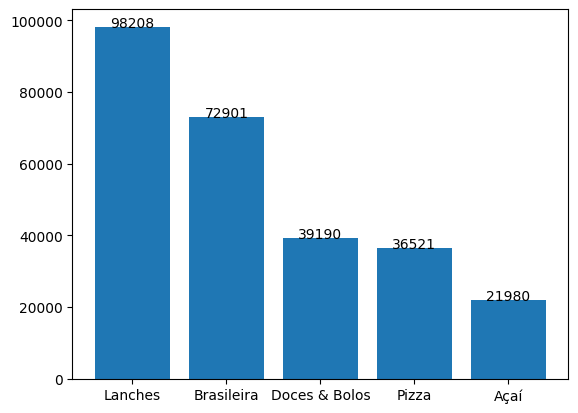

In [ ]:
categoria_n = df_analise.groupby("category")['rating'].count()
categoria_n = categoria_n.sort_values(ascending=False).head(5)
plt.bar(categoria_n.index, categoria_n.values)
for i, valor in enumerate(categoria_n.values):
    plt.text(i, valor + 0.5, str(round(valor,2)), ha='center')
plt.show()

Aqui percebemos uma coisa: As categorias que possuem a maior quantidade de restaurantes não são as mesmas que possuem as melhores notas. Poderíamos fazer um teste para validar isso, mas é uma diluição que a própria média nos dá. Por isso, vamos optar refazer a análise das categorias com melhores notas de acordo com a sua mediana.

In [ ]:
categoria_rating = df_analise.groupby("category")["rating"].median()
categoria_rating = categoria_rating.sort_values(ascending=False).head(5)

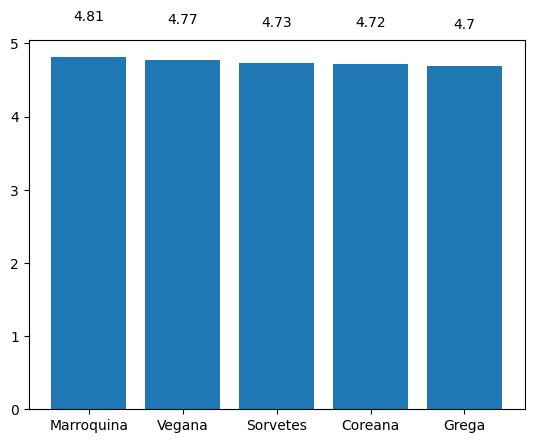

In [ ]:
plt.bar(categoria_rating.index, categoria_rating.values)
for i, valor in enumerate(categoria_rating.values):
    plt.text(i, valor + 0.5, str(round(valor,2)), ha='center')
plt.show()

E agora vamos visualizar os métodos de pagamentos mais aceitos. "Outros" foi retirado da análise.

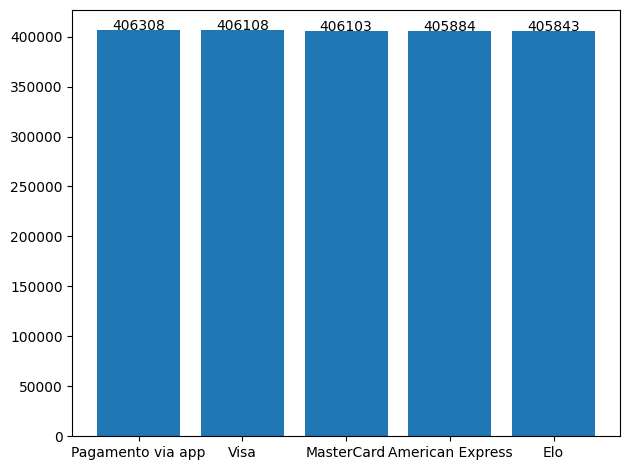

In [ ]:
plt.bar(df_metodos_top_5.index, df_metodos_top_5.values)
for i, valor in enumerate(df_metodos_top_5.values):
    plt.text(i, valor + 0.5, str(round(valor,2)), ha='center')
plt.tight_layout()
plt.show()

### Avaliando o price_range

In [ ]:
price_range_n = df_analise.groupby("price_range")['rating'].count()
price_range_n = price_range_n.sort_values(ascending=False).head(5)

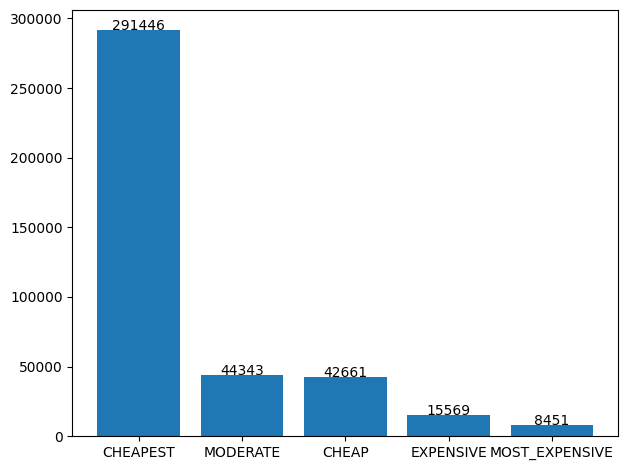

In [ ]:
plt.bar(price_range_n.index, price_range_n.values)
for i, valor in enumerate(price_range_n.values):
    plt.text(i, valor + 0.5, str(round(valor,2)), ha='center')
plt.tight_layout()
plt.show()

## Conclusão

Temos 402470 registros no nosso dataset original.
Temos uma avaliação média de 2.52, que pode estar sendo afetada pelo grande número de restaurantes sem avaliação e que podem ser novos.
Buscamos entender se existe relação entre